### 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn

# 한글 설정 /차트 마이너스 깨짐현상 해결
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

### 전체데이터 로드

In [3]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0,
               9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

##### numpy 팁

In [4]:
# column_stack() ~= Pandas DataFrame()
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

### 생선데이터로 돌아가서

In [7]:
# [[l,w] for l, w in zip(fish_length, fish_weight)]  사용하지 마세요~
fish_data = np.column_stack((fish_length,fish_weight)) # column_stack은 2차원 배열을 만들기 위한 것
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [8]:
#np.ones(), np.zeros()로 fish_target
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #concatenate는 배열을 합치는 역할
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런 train_test_split()

In [5]:
# 훈련세트, 테스트세트 분리하는 함수
from sklearn.model_selection import train_test_split

In [9]:
# random_state 42
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [10]:
train_input.shape

(36, 2)

In [18]:
train_input[:,0]

array([29.7, 12.2, 33. , 11.3, 39.5, 29. , 36. , 36. , 31. , 35. , 37. ,
       11.2, 34.5, 12. , 29. , 33. , 30.7, 38.5, 33.5, 14.3, 31.5, 25.4,
        9.8, 32. , 10.5, 33.5, 10.6, 35. , 32. , 35. , 13. , 30. , 32. ,
       15. , 30. , 41. ])

In [11]:
train_target.shape

(36,)

In [12]:
test_input.shape

(13, 2)

In [13]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### fish_target을 값을 계층화(stratify) 비율을 맞취서 분할

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify=fish_target)

In [11]:
# 3.3:1 비율로 도미비율 높아서 훈련 결과가 안좋을 수 있다.
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
#test_target의
#2.25:1 변경
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

#### 수상한 도미!

length 25cm / weight 150g

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
kn = KNeighborsClassifier() # 객체 생성
kn.fit(X=train_input, y=train_target) # 훈련실시

KNeighborsClassifier()

In [15]:
kn.score(X=test_input, y=test_target) # 정확도 1.0 ->100%

1.0

In [16]:
# 도미값 입력 예측
kn.predict([[25.0,150.0]])
# 얘는 빙어에요~

array([0.])

#### 산점도를 통해서 왜 도미가 빙어로 둔갑했는지

In [29]:
weird_bream = np.array([25.0, 150.0])
weird_bream

array([ 25., 150.])

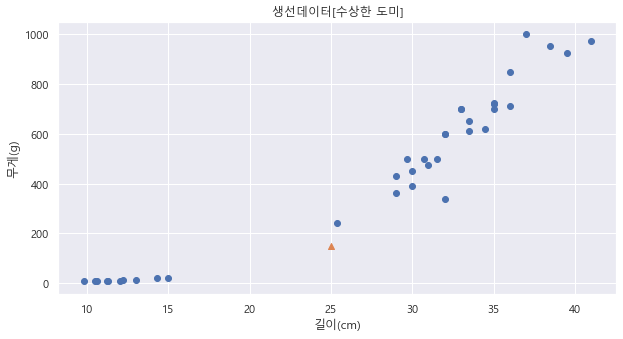

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1])
plt.scatter(x=25.0, y=150.0, marker='^')
plt.title('생선데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

##### k-최근접 이웃 찾아주는 함수
kneighbors()

In [33]:
distance, indices = kn.kneighbors([weird_bream]) # distance, indies

In [34]:
distance

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [35]:
indices

array([[21, 33, 19, 30,  1]], dtype=int64)

In [36]:
train_input[indices]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

#### 찾아낸 이웃값들을 산점도에 표시

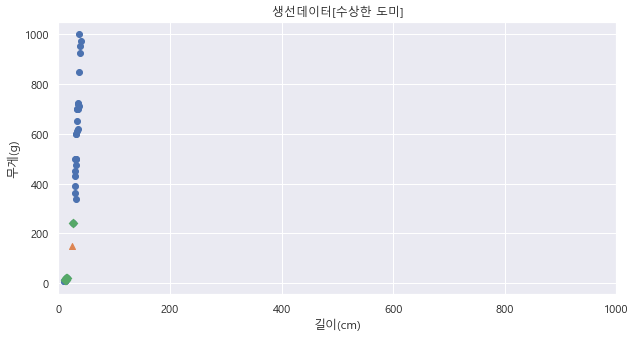

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1]) # 전체 생선데이터
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^') # 예측 생선데이터
plt.scatter(x=train_input[indices, 0], y=train_input[indices, 1], marker='D') # 우리가 추가한 마커^의 고기의 최근접 이웃인 데이터가 무엇인지 확인하는 작업
plt.xlim((0,1000))
plt.title('생선데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### 이유
x축과 y축의 단위와 범위가 달라서 눈으로 보이는 차이와 실제 거리의 차이가 있다.

#### 데이터 전처리가 필요하다!

In [48]:
mean = np.mean(a=train_input,axis=0)
mean

array([ 27.29722222, 454.09722222])

생선 길이의 평균 --> 27.2972

생선 무게의 평균 --> 454.0972

In [49]:
# 훈련세트 데이터의 전체 표준편차
std = np.std(a=train_input, axis=0)
std

array([  9.98244253, 323.29893931])

In [50]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


#### 표준점수 도출
- 도출한 평균과 표쥰편차로 변경된 스케일 데이터를 추출
    - (실제값 - 평균) / 표준편차

In [54]:
train_scaled = (train_input - mean) / std

#### 재훈련

##### weird bream도 표준화

In [59]:
std_weird_bream = (weird_bream-mean) / std

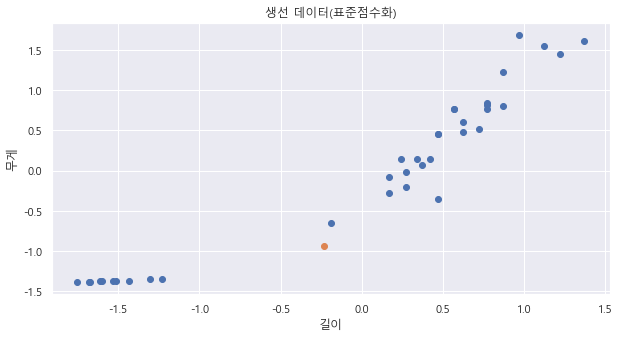

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_weird_bream[0], y=std_weird_bream[1])
plt.title('생선 데이터(표준점수화)')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [61]:
kn.fit(X=train_scaled, y=train_target)

KNeighborsClassifier()

In [62]:
test_scaled = (test_input-mean) / std

In [63]:
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [65]:
kn.score(X=test_scaled, y=test_target)

1.0

In [67]:
kn.predict(X=[std_weird_bream])

array([1.])

In [68]:
dist, inds = kn.kneighbors([std_weird_bream])
print((dist, inds))

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]), array([[21, 14, 34, 32,  5]], dtype=int64))


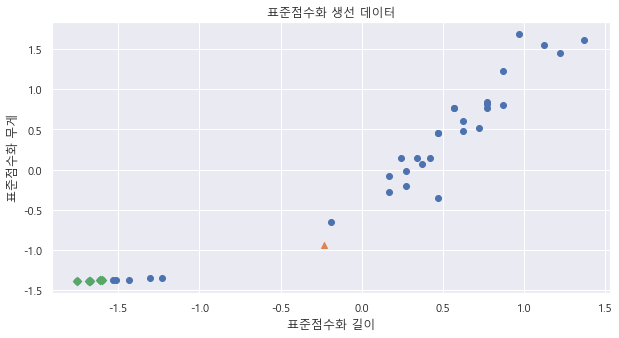

In [76]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_weird_bream[0], y=std_weird_bream[1], marker='^')
plt.scatter(x=train_scaled[inds,0], y=train_scaled[inds,1],marker='D')
plt.title('표준점수화 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')
plt.show()

In [74]:
new_smelt = np.array([[10.0, 8.7]])
std_new_smelt = (new_smelt - mean) / std
std_new_smelt

array([[-1.73276452, -1.37766373]])

In [75]:
dist, inds = kn.kneighbors(std_new_smelt)
print((dist, inds))

(array([[0.02096849, 0.05022528, 0.0603351 , 0.1202592 , 0.13022865]]), array([[22, 24, 26, 11,  3]], dtype=int64))
